In [185]:
from qutip import *
from math import *
from scipy import constants as const
import numpy as np
from matplotlib import pyplot as plt

# Declaration of operators

In [231]:
n = 4 # number of states in the Hilbert space
N = tensor(charge(n), charge(n)) # Number operator N1 * N2
N1 = tensor(charge(n), qeye(2*n+1)) # Number operator in the 1st subspace
N2 = tensor(qeye(2*n+1), charge(n)) # Number operator in the 2nd subspace

In [232]:
N2

Quantum object: dims = [[9, 9], [9, 9]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[-4.  0.  0. ...,  0.  0.  0.]
 [ 0. -3.  0. ...,  0.  0.  0.]
 [ 0.  0. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  2.  0.  0.]
 [ 0.  0.  0. ...,  0.  3.  0.]
 [ 0.  0.  0. ...,  0.  0.  4.]]

# Declaration of parameters

In [233]:
Csh = 51e-15 # F
Ec = 17.6e9 # Hz
Ej = 84.18604651162792 # Hz
Cj = 2 * const.e ** 2 / Ec / const.h
alpha = 0.43

In [234]:
Cj

4.4023248470571615e-15

# Custom functions

In [235]:
# Extended tunneling with a coefficient
def x_tunneling(N, fi_ext):
    up = Qobj(np.diag(np.ones(N-1), -1))
    down = Qobj(np.diag(np.ones(N-1), 1))
    tun1 = np.exp(1j * fi_ext) * tensor(down, up)
    tun2 = np.exp(-1j * fi_ext)*tensor(up,down)
    return (tun1 + tun2)

# Constructing the Hamiltonian

In [236]:
getH(0.43,np.pi/2)

Quantum object: dims = [[9, 9], [9, 9]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[  5.63200000e+11+0.j  -4.20930233e+01+0.j   0.00000000e+00+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [ -4.20930233e+01+0.j   4.31551584e+11+0.j  -4.20930233e+01+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j  -4.20930233e+01+0.j   3.18206336e+11+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 ..., 
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    3.18206336e+11+0.j  -4.20930233e+01+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
   -4.20930233e+01+0.j   4.31551584e+11+0.j  -4.20930233e+01+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    0.00000000e+00+0.j  -4.20930233e+01+0.j   5.63200000e+11+0.j]]

In [247]:
def getH(alpha, fi_ext):
    C = np.array([[Csh + (1 + alpha) * Cj, - Csh - alpha * Cj], [- Csh - alpha * Cj, Csh + (1 + alpha) * Cj]])
    Cinv = np.linalg.inv(C)
    Hc = 2 * (const.e ** 2)/const.h/10**9 * (Cinv[0, 0] * N1 * N1 + 2 * Cinv[0, 1] * N + Cinv[1, 1] * N2 * N2)
    cos_fi01 = tensor(tunneling(2*n+1, 1), qeye(2*n+1))/2
    cos_fi20 = tensor(qeye(2*n+1), tunneling(2*n+1, 1))/2
    cos_fi12 = x_tunneling(2*n+1, fi_ext)/2
    Hj = -Ej*(cos_fi01 + alpha * cos_fi12 + cos_fi20)
    H = Hc + Hj
    return H

# Eigenenergies as a function of $\phi_{ext}$

In [254]:
def calc_and_plot_Eigenenergies(alpha):
    fi_ext = np.linspace(4/5*const.pi, 6/5*const.pi, 101)

    E0 = np.empty_like(fi_ext)
    E1 = np.empty_like(fi_ext)
    E2 = np.empty_like(fi_ext)
    E3 = np.empty_like(fi_ext)

    i = 0
    for fi in fi_ext:
        H = getH(alpha, fi)
        eigs,garbage = H.eigenstates(sparse=True,eigvals=4)
        E0[i] = eigs[0]
        E1[i] = eigs[1]
        E2[i] = eigs[2]
        E3[i] = eigs[3]
        i += 1

    # Plot differences
    plt.plot(fi_ext, (E1 - E0))
    plt.plot(fi_ext, (E2 - E0))
    plt.plot(fi_ext, (E2 - E1))
    plt.plot(fi_ext, (E3 - E0)/2)
    plt.plot(fi_ext, (E2 - E0)/2)
    plt.legend(["$E_1 - E_0$", "$E_2 - E_1$", "$(E_2 - E_0)/2$"])
    
    # Plot eigenenergies
#     plt.plot(fi_ext, E0 / 1e9)
#     plt.plot(fi_ext, E1 / 1e9)
#     plt.plot(fi_ext, E2 / 1e9)
#     plt.plot(fi_ext, E3 / 1e9)

    plt.xlabel("$ \phi_{ext} = 2\pi \Phi_{ext}/\Phi_0$, radians")
    plt.ylabel("E, GHz")
    plt.title(r"$\alpha = $" + str(alpha))
    plt.xlim(4/5*const.pi, 6/5*const.pi)

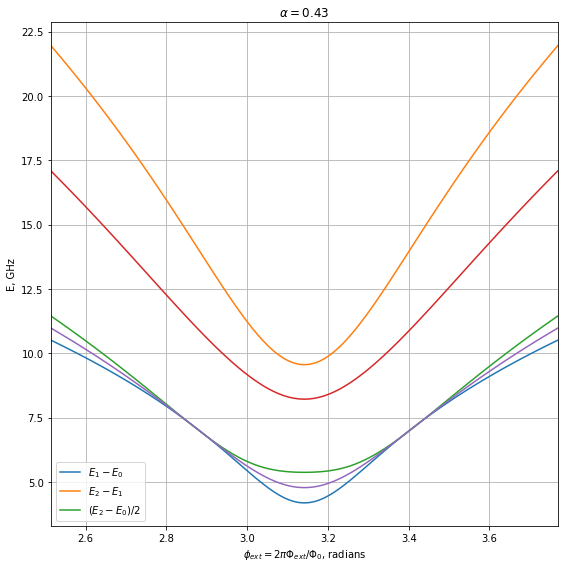

In [258]:
plt.figure(figsize=(8, 8))
# plt.subplot(121)
calc_and_plot_Eigenenergies(0.43)
# plt.subplot(122)
# calc_and_plot_Eigenenergies(0.6)
plt.grid()
plt.tight_layout()

plt.savefig("eigenenergies_dif.png")
plt.show()